In [1]:
import sys
sys.path.insert(1, '../../ana_tools')
import getters, tools, graphic_tools, setters
import matplotlib.pyplot as plt
plt.style.use('../../ana_tools/presentation.mplstyle')
import numpy as np
path = "/eos/user/j/jcapotor/FBGana/camara_climatica/MarchRuns/"
plateaus = getters.get_plateaus()
rtdcalib = getters.get_rtdcal()

/afs/cern.ch/user/j/jcapotor/FBG_TMS
/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools/plateaus.json
/afs/cern.ch/user/j/jcapotor/FBG_TMS
/afs/cern.ch/user/j/jcapotor/FBG_TMS/ana_tools/rtd_calib.json


In [2]:
def line(x, A, B):
    return A + B*x

# Description of the 2023 March Runs #

The objective of this notebook is to characterise the setups used for the runs taken during February 2023 at the IFIC facilities.

In this notebook **only information about the setup will be found.** Here we will explain in detail the characteristics of the setup, mainly focusing on the position of the RTD sensors.
## Climatic Chamber, IFIC ##

Two different setups ...

## 20230321 ##
# Description of the setup #
The 20230321 setup description can be found below:
* A total of 5 RTDs were connected.
* RTD1 was placed on the top position, close to the top of the cylinder.
* RTD2 was placed just behind the FBGs, close to the bottom part of the copper cylinder.

Keys to read: ['Temp1', 'Temp2']


Reading temperature key: Temp: 100%|██████████| 2/2 [00:00<00:00, 45.21it/s]
No handles with labels found to put in legend.


Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'T5', 'Timestamp'], dtype='object')


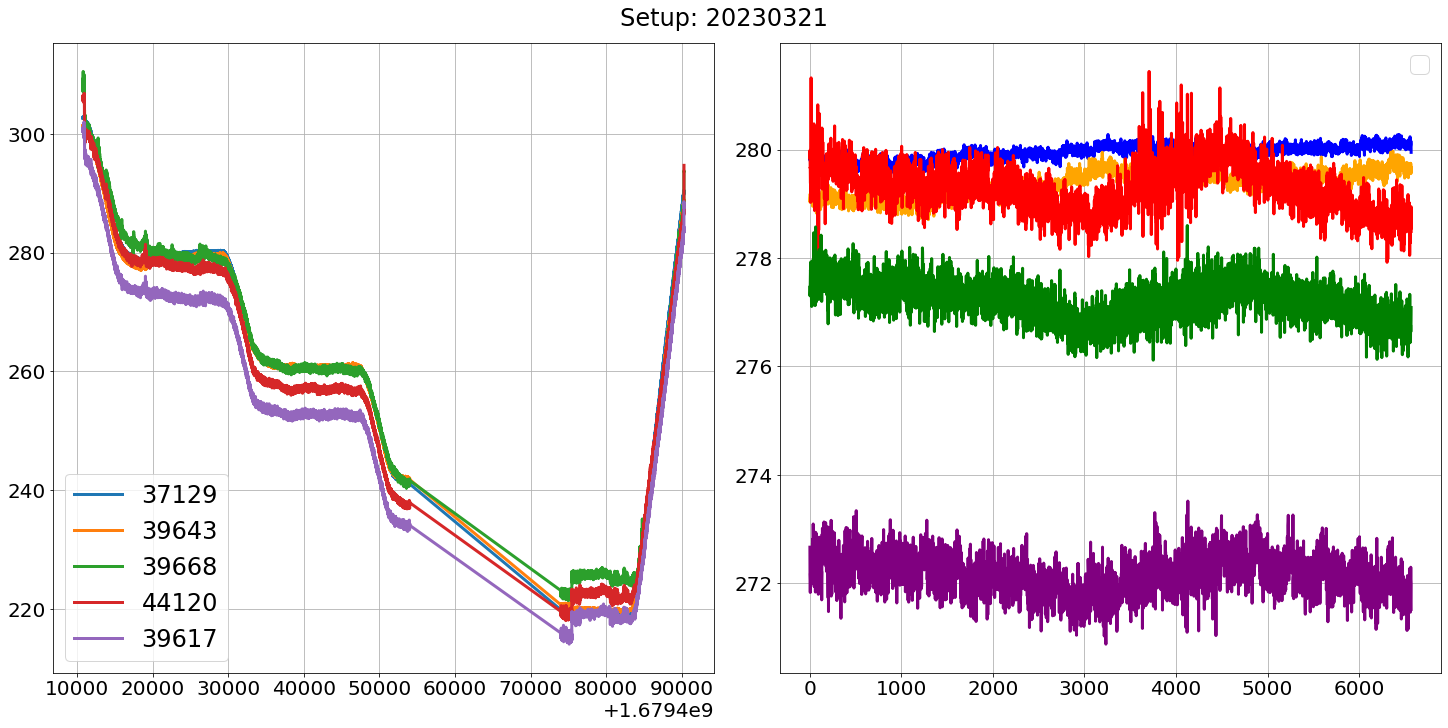

In [6]:
date = "20230321"
ids = {"T1":"37129", "T2":"39643", "T3":"39668", "T4":"44120", "T5":"39617"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
ref = "T2"
def plot_temperature_profile(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Setup: " + date)
    for sens in ids.keys():
        axes[0].plot(rtds["Timestamp"], rtds[sens], label=ids[sens])
        for plateau in plateaus[date].keys():
            if plateau != "273_down":
                continue
            t0 = plateaus[date][plateau][0] + 8000
            tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[1].plot(tcut["Timestamp"]-t0, tcut[sens] - cc, color=colors[sens])
    axes[0].legend()
    axes[1].legend()
plot_temperature_profile(date, ids)

## 20230322 ##
# Description of the setup #
The 20230322 setup description can be found below:
* A total of 5 RTDs were connected.
* RTD1 was placed on the top position, close to the top of the cylinder.
* RTD2 was placed just behind the FBGs, close to the bottom part of the copper cylinder.

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 25.32it/s]
No handles with labels found to put in legend.


Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'Timestamp'], dtype='object')


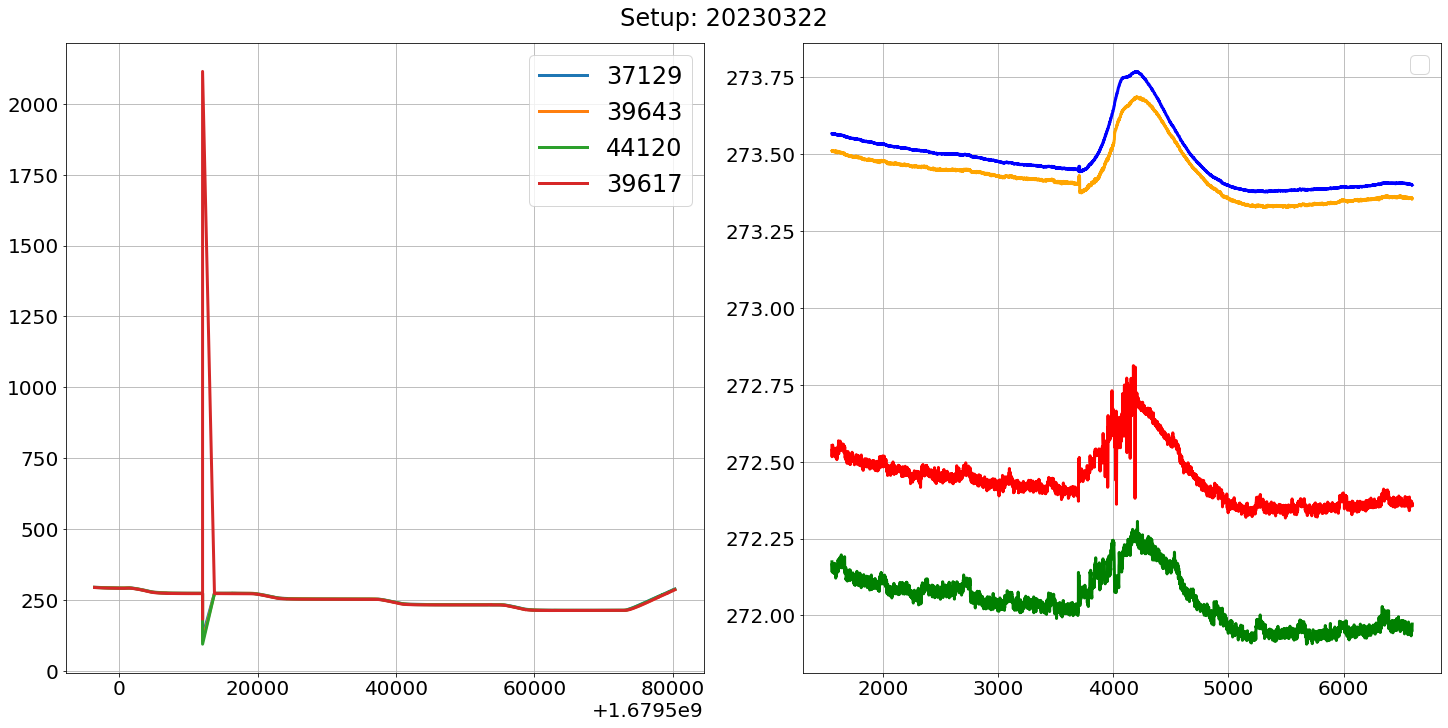

In [25]:
date = "20230322"
ids = {"T1":"37129", "T2":"39643", "T3":"44120", "T4":"39617"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
ref = "T2"
def plot_temperature_profile(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Setup: " + date)
    for sens in ids.keys():
        axes[0].plot(rtds["Timestamp"], rtds[sens], label=ids[sens])
        for plateau in plateaus[date].keys():
            if plateau != "273_down":
                continue
            t0 = plateaus[date][plateau][0] + 8000
            tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[1].plot(tcut["Timestamp"]-t0, tcut[sens] - cc, color=colors[sens])
    axes[0].legend()
    axes[1].legend()
plot_temperature_profile(date, ids)

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'Timestamp'], dtype='object')



No handles with labels found to put in legend.


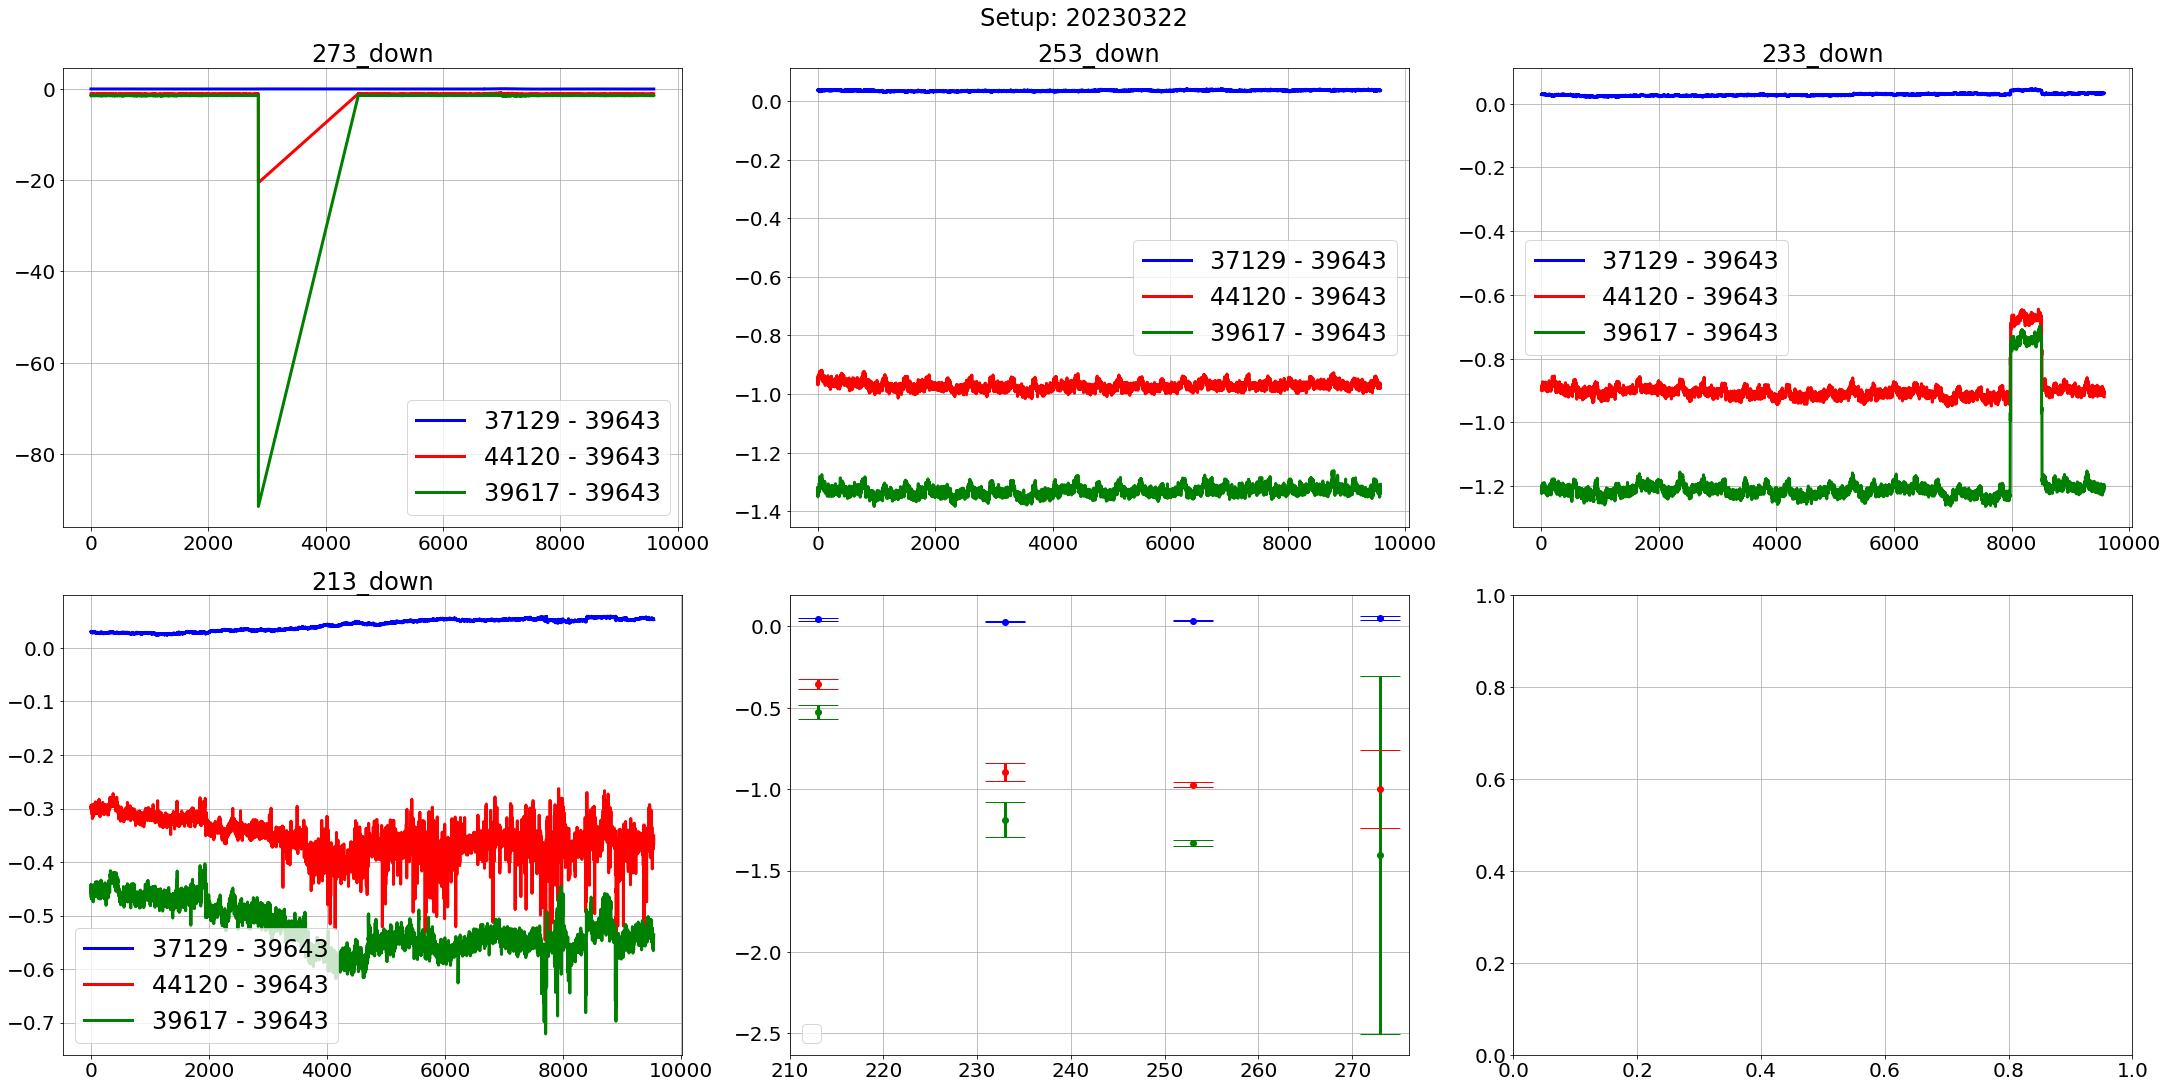

In [34]:
def plot_temperature_plateau(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    rtds = rtds.loc[(rtds["T4"]<300) & (rtds["T3"]>-1)].reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=2)
    fig.set_size_inches(30, 15)
    fig.suptitle("Setup: " + date)
    cnt = 0
    ref = "T2"
    for plateau in plateaus[date]:
        for sens in ids.keys():
            if sens == ref:
                continue
            if plateau != "293_down":
                t0 = plateaus[date][plateau][0] + 5000
                tf = plateaus[date][plateau][1]
            else:
                t0 = plateaus[date][plateau][0] + 5000
                tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[cnt].plot(tcut["Timestamp"]-t0, tcut[sens]-tcut[ref] - cc,
                           color=colors[sens],
                           label=ids[sens] + " - " + ids[ref])
            axes[4].errorbar(int(plateau.split("_")[0]), np.mean(tcut[sens]-tcut[ref] - cc),
                             color=colors[sens],
                             linestyle="-.", fmt="o",
                             yerr=np.std(tcut[sens]-tcut[ref] - cc), capsize=20)
        axes[cnt].set_title(plateau)
        axes[cnt].legend()
        cnt += 1
    axes[4].legend()
plot_temperature_plateau(date, ids)

## 20230329 ##
# Description of the setup #
The 20230329 setup description can be found below:
* A total of 5 RTDs were connected.
* RTD1 was placed on the top position, close to the top of the cylinder.
* RTD2 was placed just behind the FBGs, close to the bottom part of the copper cylinder.

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]
No handles with labels found to put in legend.


Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'Timestamp'], dtype='object')


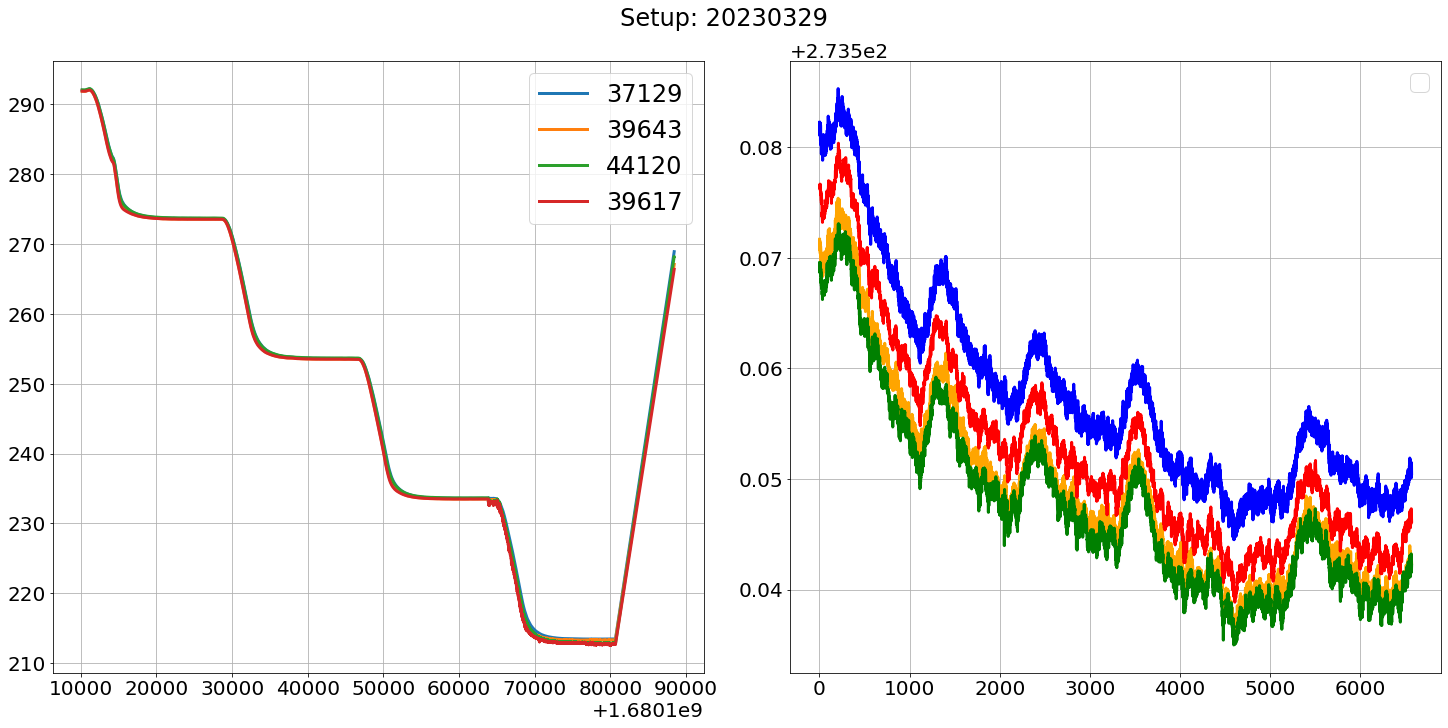

In [9]:
date = "20230329"
ids = {"T1":"37129", "T2":"39643", "T3":"44120", "T4":"39617"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
ref = "T2"
def plot_temperature_profile(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Setup: " + date)
    for sens in ids.keys():
        axes[0].plot(rtds["Timestamp"], rtds[sens], label=ids[sens])
        for plateau in plateaus[date].keys():
            if plateau != "273_down":
                continue
            t0 = plateaus[date][plateau][0] + 8000
            tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[1].plot(tcut["Timestamp"]-t0, tcut[sens] - cc, color=colors[sens])
    axes[0].legend()
    axes[1].legend()
plot_temperature_profile(date, ids)

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 27.15it/s]

Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'Timestamp'], dtype='object')



No handles with labels found to put in legend.


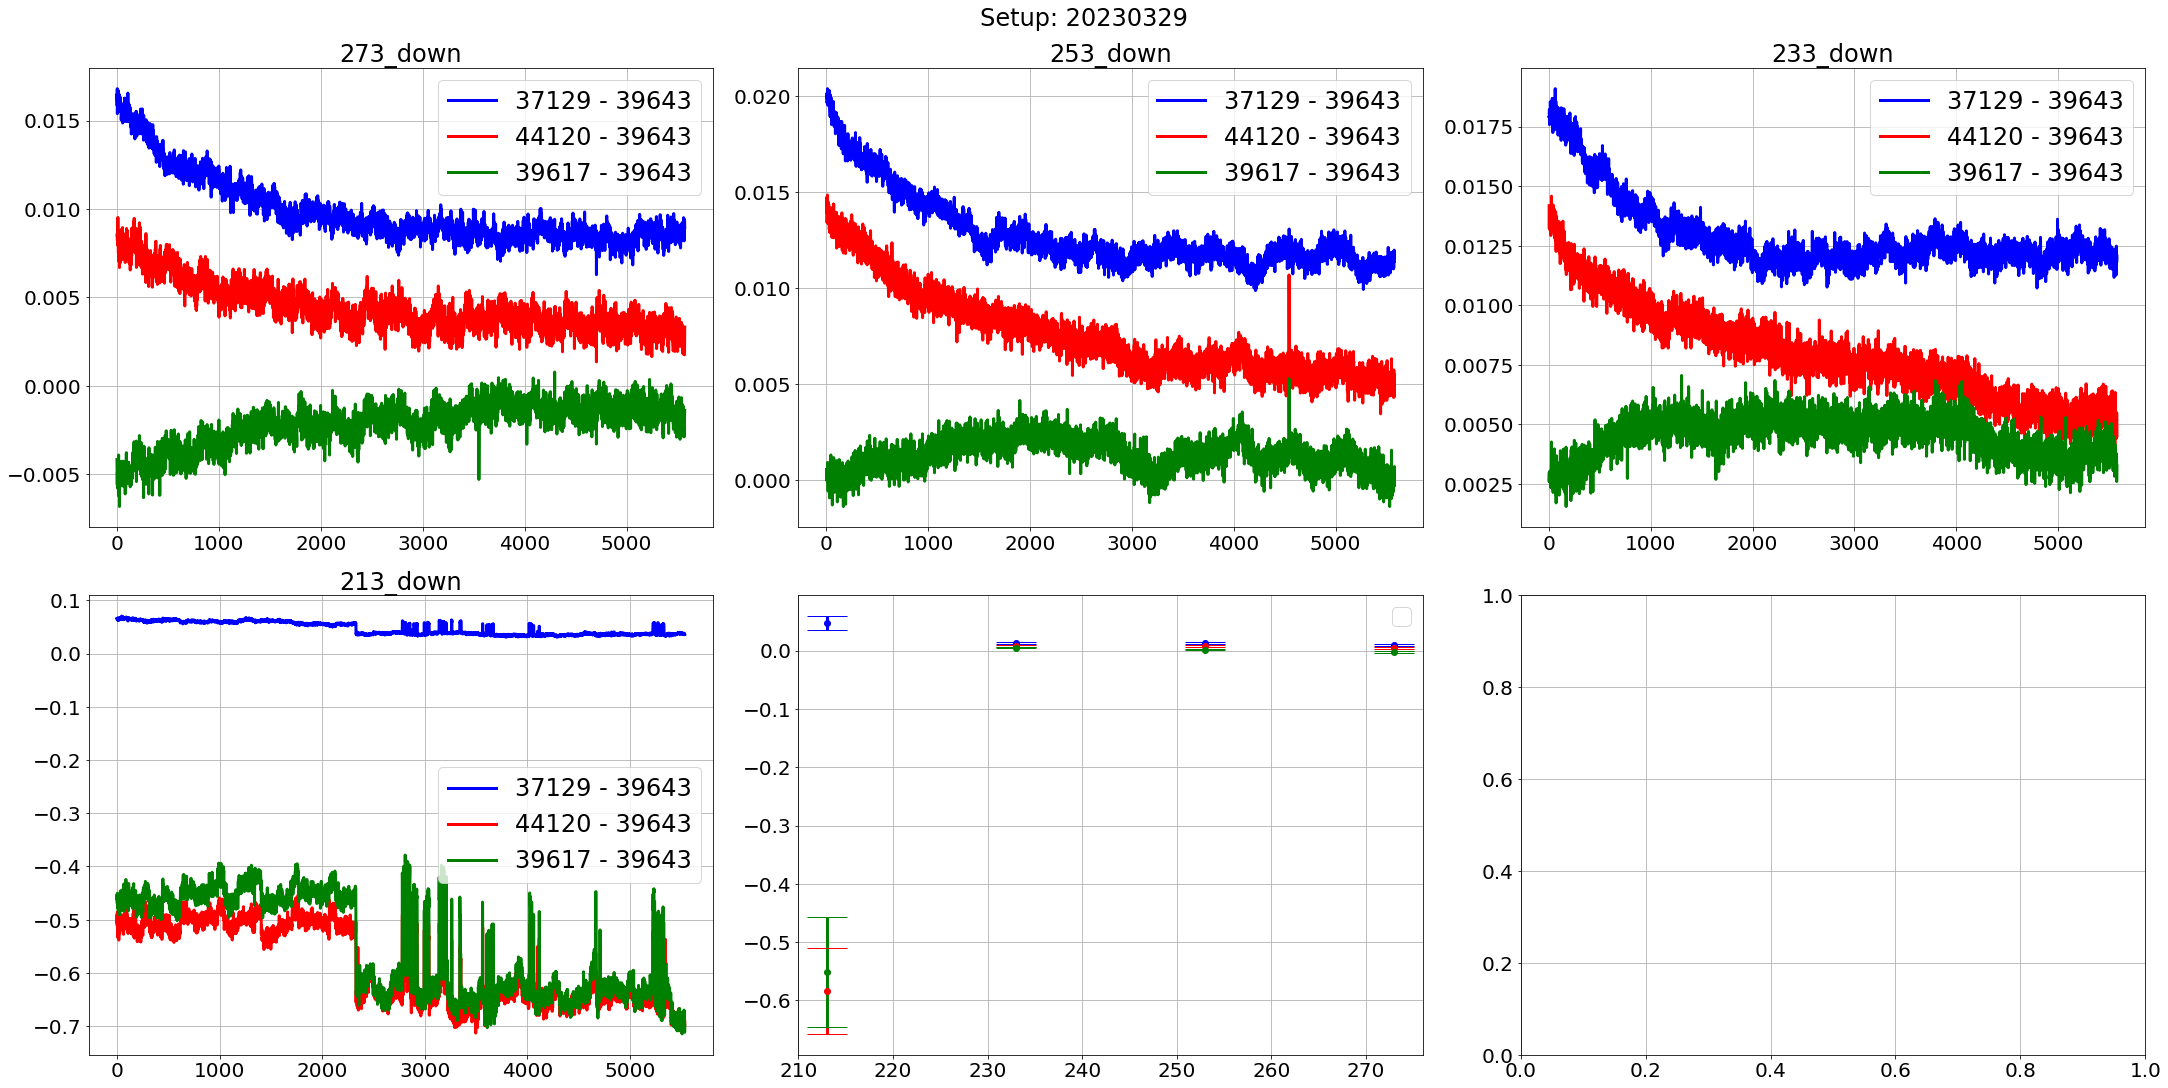

In [12]:
def plot_temperature_plateau(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=2)
    fig.set_size_inches(30, 15)
    fig.suptitle("Setup: " + date)
    cnt = 0
    ref = "T2"
    for plateau in plateaus[date]:
        for sens in ids.keys():
            if sens == ref:
                continue
            if plateau != "293_down":
                t0 = plateaus[date][plateau][0] + 6500
                tf = plateaus[date][plateau][1] - 2500
            else:
                t0 = plateaus[date][plateau][0]
                tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[cnt].plot(tcut["Timestamp"]-t0, tcut[sens]-tcut[ref] - cc,
                           color=colors[sens],
                           label=ids[sens] + " - " + ids[ref])
            axes[4].errorbar(int(plateau.split("_")[0]), np.mean(tcut[sens]-tcut[ref] - cc),
                             color=colors[sens],
                             linestyle="-.", fmt="o",
                             yerr=np.std(tcut[sens]-tcut[ref] - cc), capsize=20)
        axes[cnt].set_title(plateau)
        axes[cnt].legend()
        cnt += 1
    axes[4].legend()
plot_temperature_plateau(date, ids)

## 20230323 ##
# Description of the setup #
The 20230323 setup description can be found below:
* A total of 5 RTDs were connected.
* RTD1 was placed on the top position, close to the top of the cylinder.
* RTD2 was placed just behind the FBGs, close to the bottom part of the copper cylinder.

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]

Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'Timestamp'], dtype='object')



No handles with labels found to put in legend.


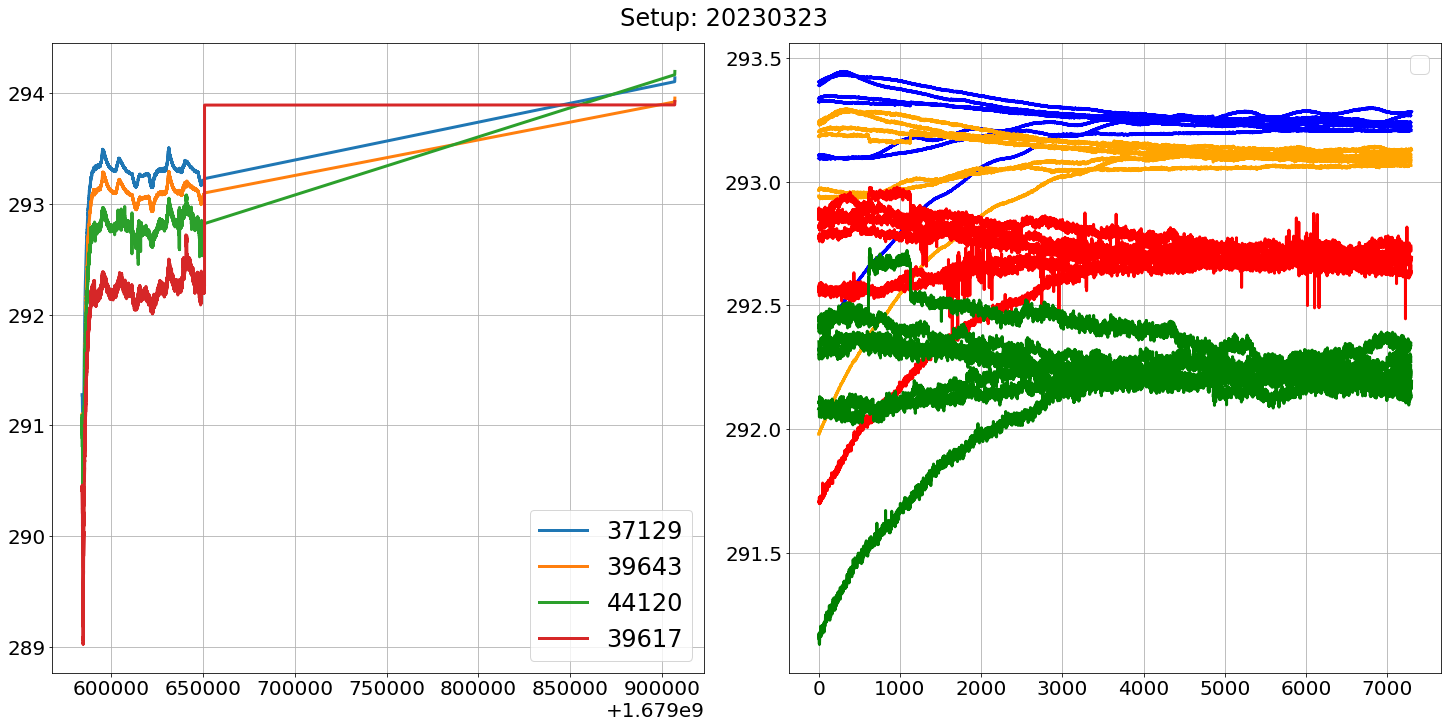

In [20]:
date = "20230323"
ids = {"T1":"37129", "T2":"39643", "T3":"44120", "T4":"39617"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
ref = "T2"
def plot_temperature_profile(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Setup: " + date)
    for sens in ids.keys():
        axes[0].plot(rtds["Timestamp"], rtds[sens], label=ids[sens])
        for plateau in plateaus[date].keys():
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[1].plot(tcut["Timestamp"]-t0, tcut[sens] - cc, color=colors[sens])
    axes[0].legend()
    axes[1].legend()
plot_temperature_profile(date, ids)

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 29.71it/s]

Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'Timestamp'], dtype='object')



No handles with labels found to put in legend.


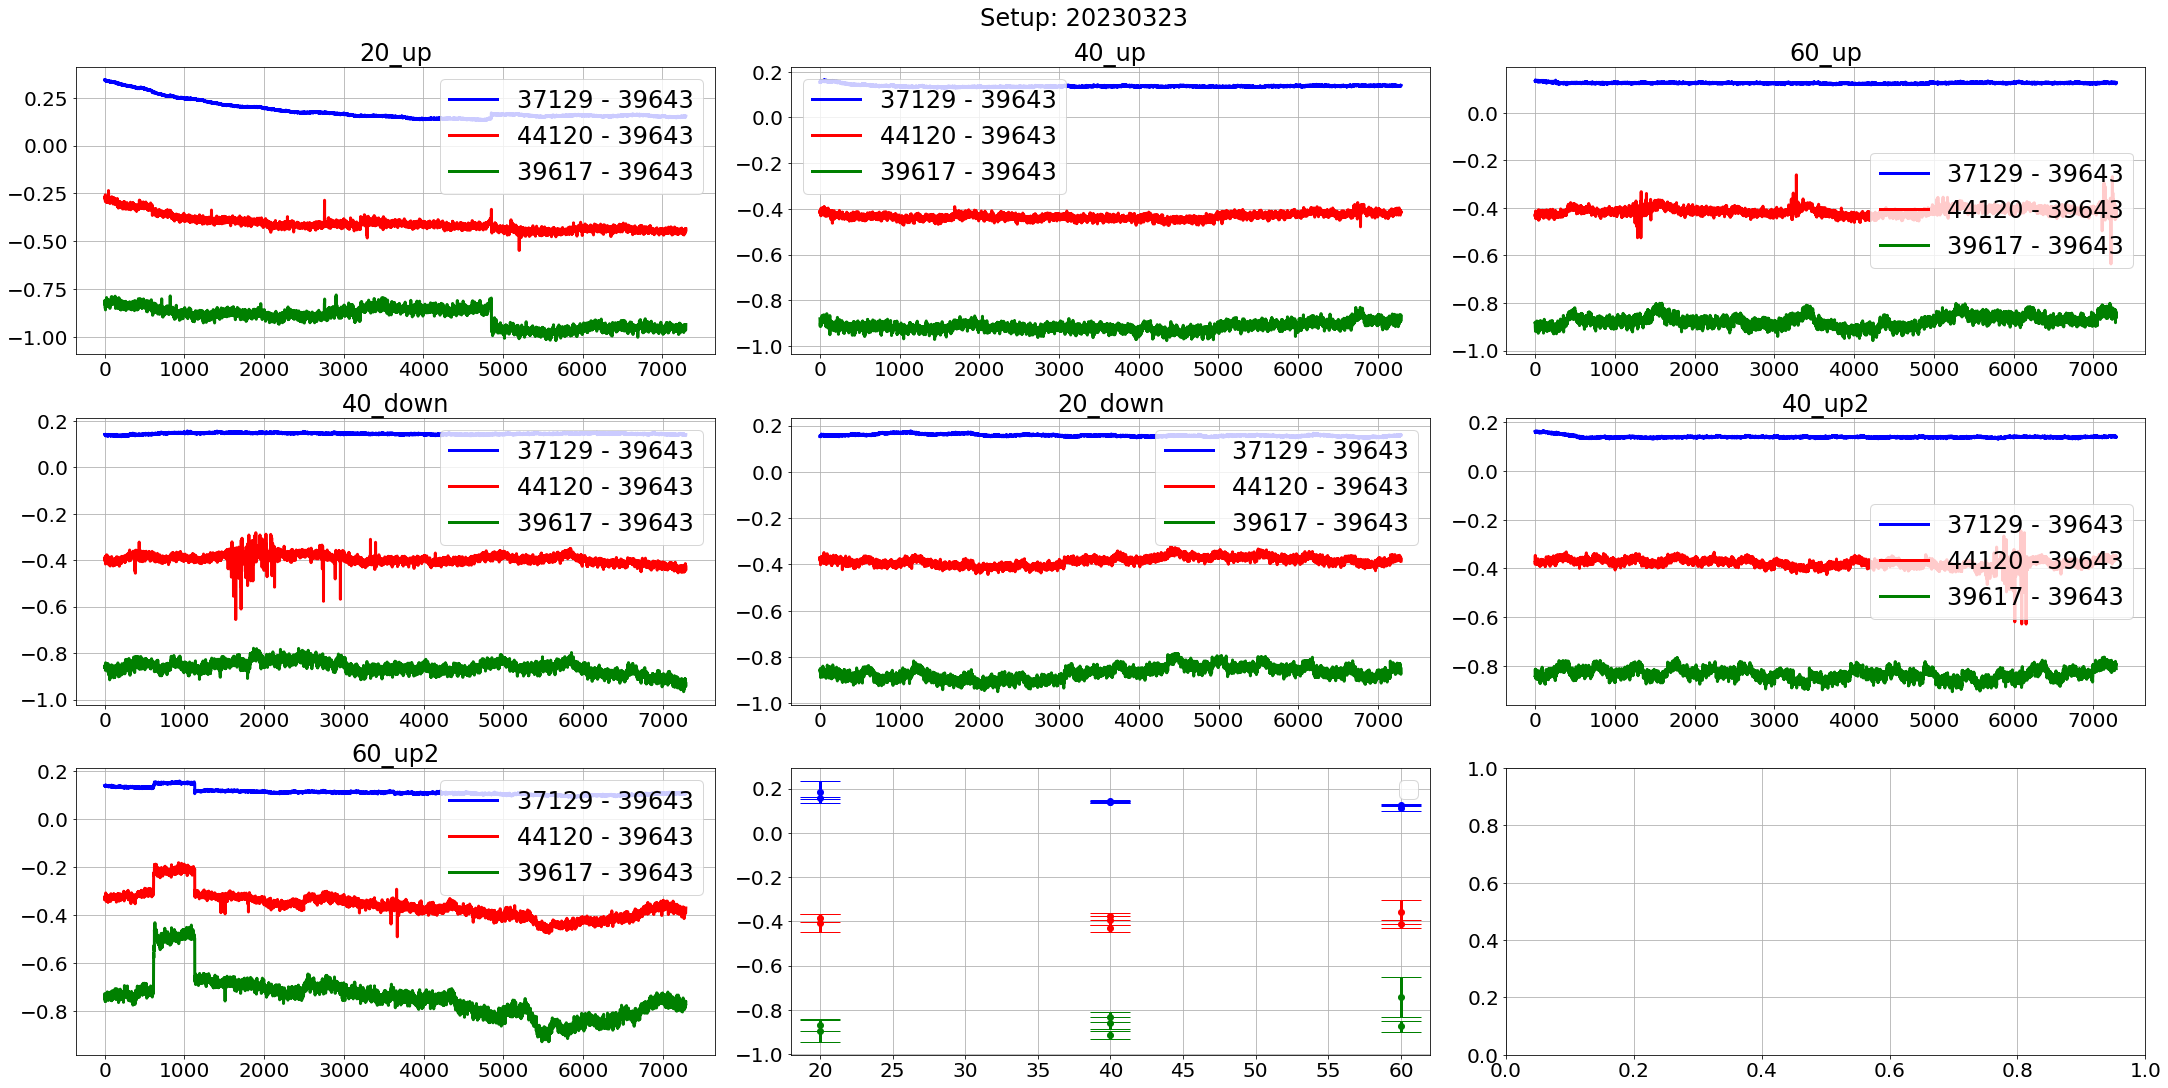

In [21]:
def plot_temperature_plateau(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=3)
    fig.set_size_inches(30, 15)
    fig.suptitle("Setup: " + date)
    cnt = 0
    ref = "T2"
    for plateau in plateaus[date]:
        for sens in ids.keys():
            if sens == ref:
                continue
            if plateau != "293_down":
                t0 = plateaus[date][plateau][0]
                tf = plateaus[date][plateau][1]
            else:
                t0 = plateaus[date][plateau][0]
                tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[cnt].plot(tcut["Timestamp"]-t0, tcut[sens]-tcut[ref] - cc,
                           color=colors[sens],
                           label=ids[sens] + " - " + ids[ref])
            axes[7].errorbar(int(plateau.split("_")[0]), np.mean(tcut[sens]-tcut[ref] - cc),
                             color=colors[sens],
                             linestyle="-.", fmt="o",
                             yerr=np.std(tcut[sens]-tcut[ref] - cc), capsize=20)
        axes[cnt].set_title(plateau)
        axes[cnt].legend()
        cnt += 1
    axes[7].legend()
plot_temperature_plateau(date, ids)

## 20230327 ##
# Description of the setup #
The 20230327 setup description can be found below:
* A total of 5 RTDs were connected.
* RTD1 was placed on the top position, close to the top of the cylinder.
* RTD2 was placed just behind the FBGs, close to the bottom part of the copper cylinder.

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00,  9.01it/s]

Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'Timestamp'], dtype='object')



No handles with labels found to put in legend.


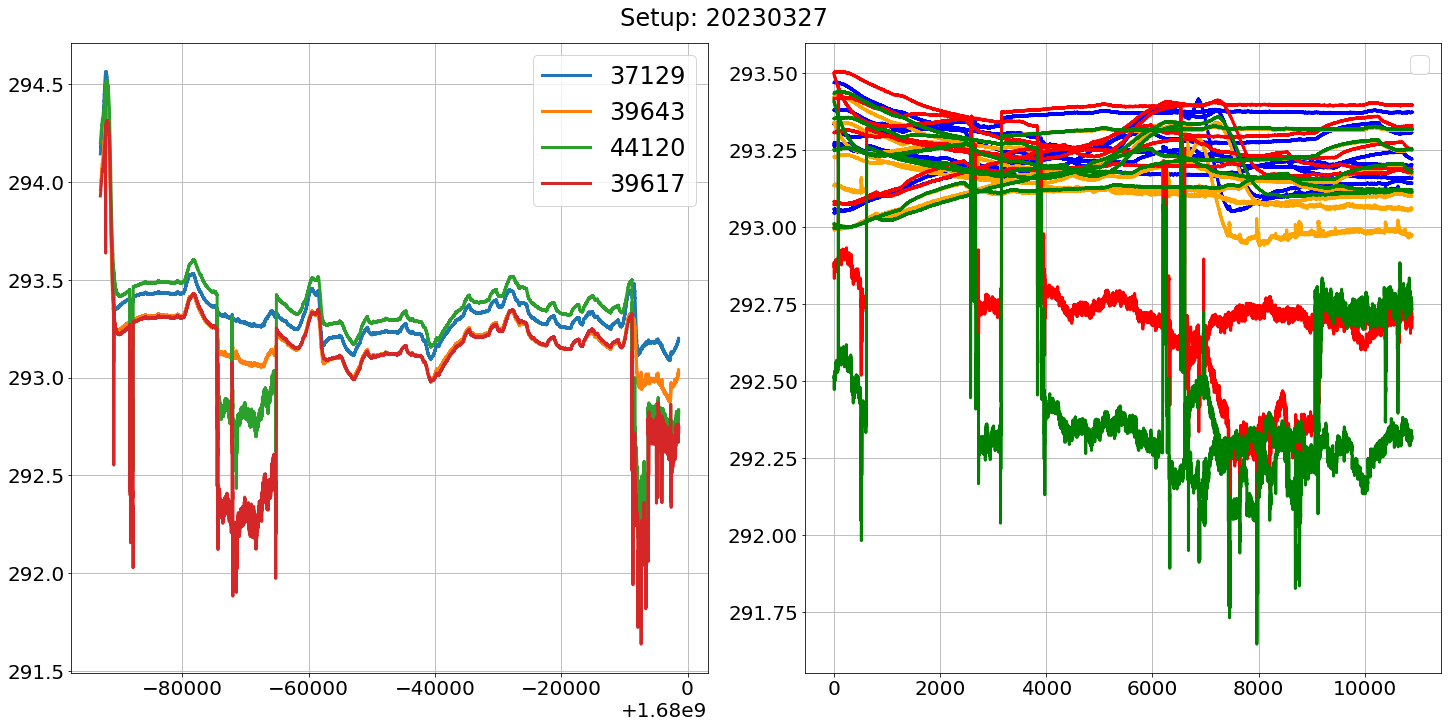

In [22]:
date = "20230327"
ids = {"T1":"37129", "T2":"39643", "T3":"44120", "T4":"39617"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
ref = "T2"
def plot_temperature_profile(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Setup: " + date)
    for sens in ids.keys():
        axes[0].plot(rtds["Timestamp"], rtds[sens], label=ids[sens])
        for plateau in plateaus[date].keys():
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[1].plot(tcut["Timestamp"]-t0, tcut[sens] - cc, color=colors[sens])
    axes[0].legend()
    axes[1].legend()
plot_temperature_profile(date, ids)

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 23.36it/s]

Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'Timestamp'], dtype='object')



No handles with labels found to put in legend.


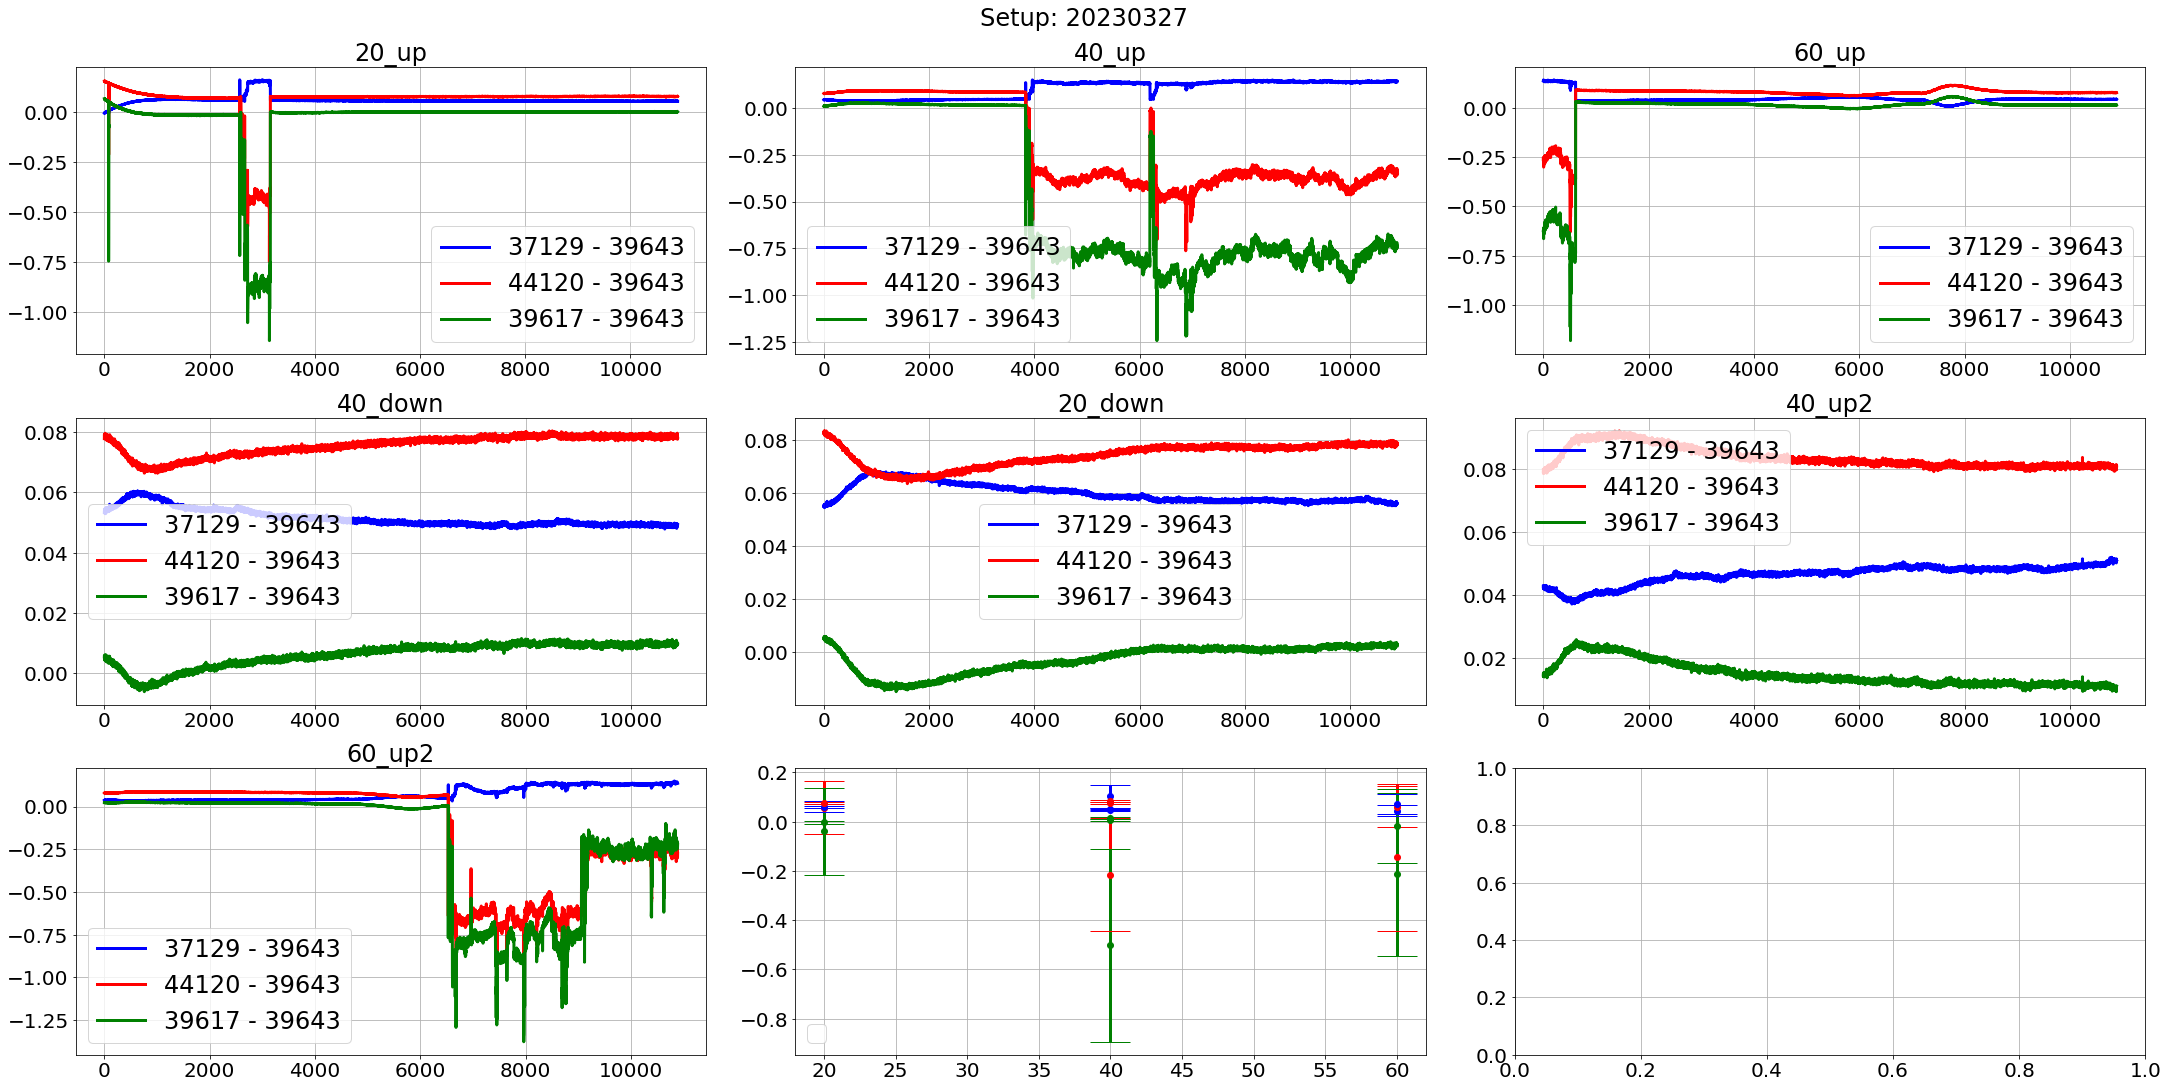

In [23]:
date = "20230327"
ids = {"T1":"37129", "T2":"39643", "T3":"44120", "T4":"39617"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
ref = "T2"
def plot_temperature_plateau(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=3)
    fig.set_size_inches(30, 15)
    fig.suptitle("Setup: " + date)
    cnt = 0
    ref = "T2"
    for plateau in plateaus[date]:
        for sens in ids.keys():
            if sens == ref:
                continue
            if plateau != "293_down":
                t0 = plateaus[date][plateau][0]
                tf = plateaus[date][plateau][1]
            else:
                t0 = plateaus[date][plateau][0]
                tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[cnt].plot(tcut["Timestamp"]-t0, tcut[sens]-tcut[ref] - cc,
                           color=colors[sens],
                           label=ids[sens] + " - " + ids[ref])
            axes[7].errorbar(int(plateau.split("_")[0]), np.mean(tcut[sens]-tcut[ref] - cc),
                             color=colors[sens],
                             linestyle="-.", fmt="o",
                             yerr=np.std(tcut[sens]-tcut[ref] - cc), capsize=20)
        axes[cnt].set_title(plateau)
        axes[cnt].legend()
        cnt += 1
    axes[7].legend()
plot_temperature_plateau(date, ids)

## 20230328 ##
# Description of the setup #
The 20230328 setup description can be found below:
* A total of 5 RTDs were connected.
* RTD1 was placed on the top position, close to the top of the cylinder.
* RTD2 was placed just behind the FBGs, close to the bottom part of the copper cylinder.

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 26.76it/s]

Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'Timestamp'], dtype='object')



No handles with labels found to put in legend.


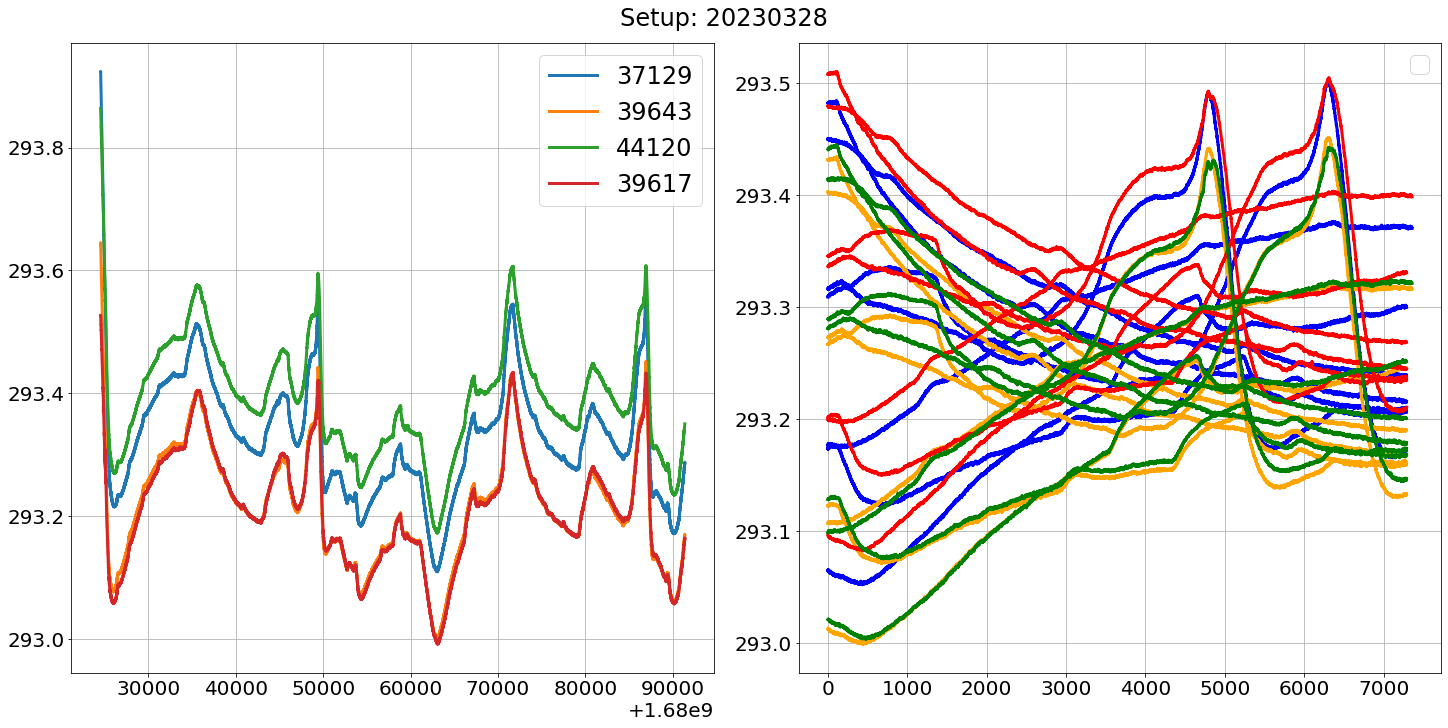

In [17]:
date = "20230328"
ids = {"T1":"37129", "T2":"39643", "T3":"44120", "T4":"39617"}
colors = {"T1":"blue", "T2":"orange", "T3":"red", "T4":"green", "T5":"purple", "T6":"black"}
ref = "T2"
def plot_temperature_profile(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=2, nrows=1)
    fig.set_size_inches(20, 10)
    fig.suptitle("Setup: " + date)
    for sens in ids.keys():
        axes[0].plot(rtds["Timestamp"], rtds[sens], label=ids[sens])
        for plateau in plateaus[date].keys():
            t0 = plateaus[date][plateau][0]
            tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[1].plot(tcut["Timestamp"]-t0, tcut[sens] - cc, color=colors[sens])
    axes[0].legend()
    axes[1].legend()
plot_temperature_profile(date, ids)

Keys to read: ['Temp1']


Reading temperature key: Temp: 100%|██████████| 1/1 [00:00<00:00, 29.28it/s]

Index(['Date', 'Time', 'T1', 'T2', 'T3', 'T4', 'Timestamp'], dtype='object')



No handles with labels found to put in legend.


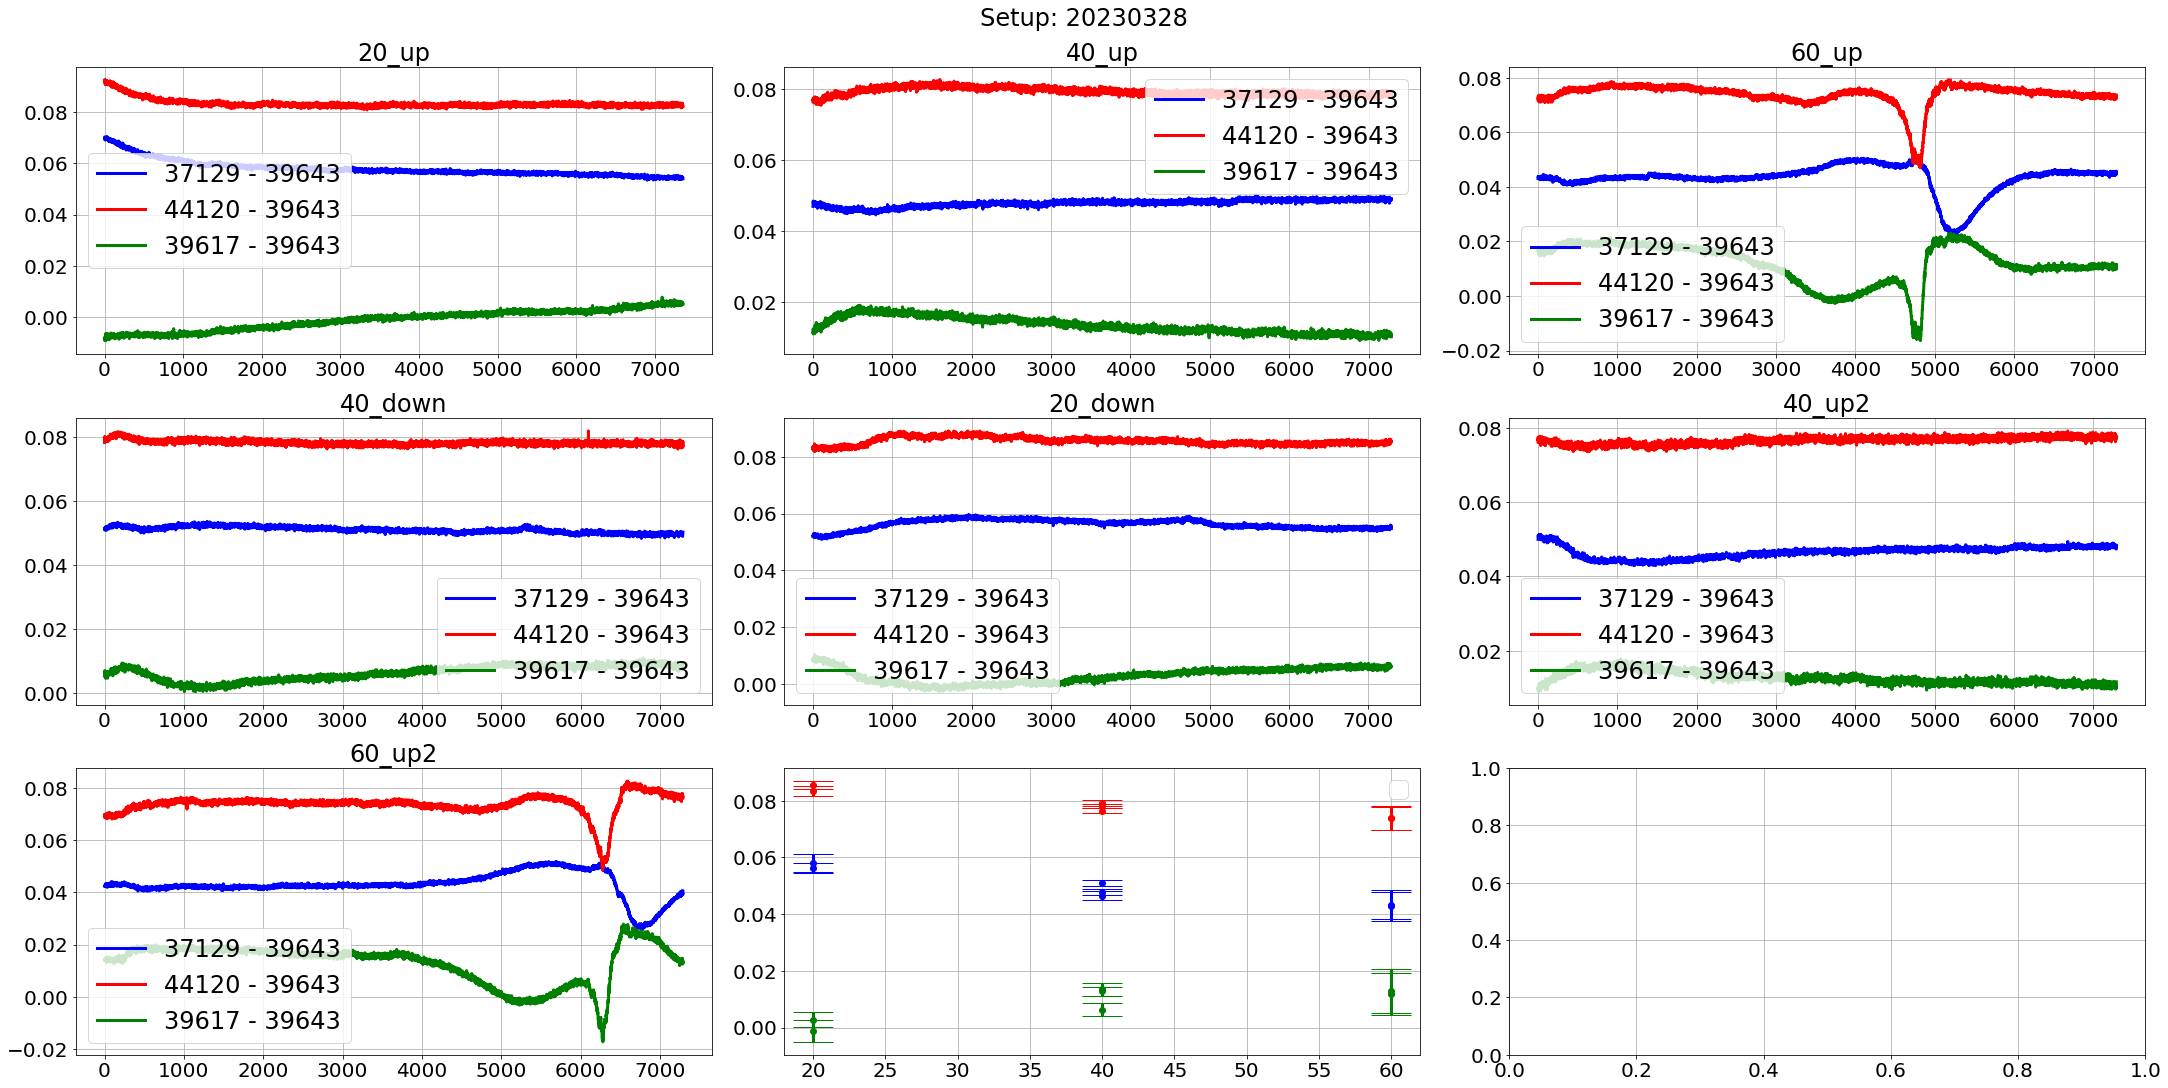

In [19]:
def plot_temperature_plateau(date, ids):
    rtds = getters.get_raw_data(path_to_split=path+date+"/",
                                filetype="temperature",
                                pol="Temp").sort_values(by="Timestamp").reset_index(drop=True)
    print(rtds.columns)
    fig, axes = graphic_tools.make_figure(ncols=3, nrows=3)
    fig.set_size_inches(30, 15)
    fig.suptitle("Setup: " + date)
    cnt = 0
    ref = "T2"
    for plateau in plateaus[date]:
        for sens in ids.keys():
            if sens == ref:
                continue
            if plateau != "293_down":
                t0 = plateaus[date][plateau][0]
                tf = plateaus[date][plateau][1]
            else:
                t0 = plateaus[date][plateau][0]
                tf = plateaus[date][plateau][1]
            tcut = rtds.loc[(rtds["Timestamp"]>t0)&(rtds["Timestamp"]<tf)]
            cc = line(int(plateau.split("_")[0]), rtdcalib[ids[ref]][ids[sens]][0], rtdcalib[ids[ref]][ids[sens]][1])
            axes[cnt].plot(tcut["Timestamp"]-t0, tcut[sens]-tcut[ref] - cc,
                           color=colors[sens],
                           label=ids[sens] + " - " + ids[ref])
            axes[7].errorbar(int(plateau.split("_")[0]), np.mean(tcut[sens]-tcut[ref] - cc),
                             color=colors[sens],
                             linestyle="-.", fmt="o",
                             yerr=np.std(tcut[sens]-tcut[ref] - cc), capsize=20)
        axes[cnt].set_title(plateau)
        axes[cnt].legend()
        cnt += 1
    axes[7].legend()
plot_temperature_plateau(date, ids)